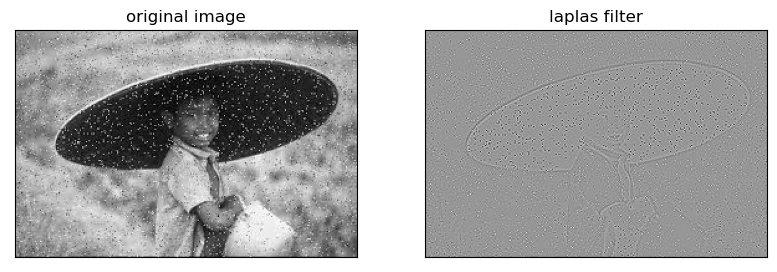

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image=cv.imread('exam4.jpeg',0)
plt.figure(figsize=(15,15))
plt.subplot(331)
plt.imshow(image,cmap='gray')
plt.title('original image')
plt.xticks([])
plt.yticks([])
#------------------------------ make window ------------------------------
# n=size of window
n=3

#make window
w=np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])

#------------------------------ define function to add row & col to image ------------------------------
def f_add_row_col(img,count):
    row , col=img.shape
    first_row=img[0,:]
    last_row=img[row-1,:]

    n_add=np.int8((count-1)/2)
    for i in range(n_add):
        img=np.insert(img,0,first_row,axis=0)
        row,col=img.shape
        img=np.insert(img,row,last_row,axis=0)

    row , col=img.shape
    first_col=img[:,0]
    last_col=img[:,col-1]
    for i in range(n_add):
        img=np.insert(img,0,first_col,axis=1)
        row,col=img.shape
        img=np.insert(img,col,last_col,axis=1)
    return img

#------------------------------ define function to del row & col to image ------------------------------
def f_del_row_col(img,count):
    s=np.int8((count-1)/2)
    for i in range(s):
        img=np.delete(img,0,0)        
        img=np.delete(img,0,1)
        r,c =img.shape
        img=np.delete(img,r-1,0)        
        img=np.delete(img,c-1,1)
    return img

#------------------------------ make largest image ------------------------------
image_n=f_add_row_col(image,n)

#------------------------------ define function to mask a pixel ------------------------------
def f_mask_pixel(img,i,j,w,count):
    new_value=0
    s=np.int8((count-1)/2)
    wr , wc =w.shape
    for r in range(wr):
        for c in range(wc):
            value_w=w[r,c]
            value_image=img[i-s-1+r, j-s-1+c]
            new_value=new_value+(value_w*value_image)  
    new_value=new_value
    return new_value

#------------------------------ masking ------------------------------

row , col=image_n.shape
s=np.int8((n-1)/2)
first_pixel_in_row =s
last_pixel_in_row=row-s
first_pixel_in_col =s
last_pixel_in_col=col-s
image_new=np.zeros((row,col))
for i in range(first_pixel_in_row,last_pixel_in_row,1):
    for j in range(first_pixel_in_col,last_pixel_in_col,1):
        image_new[i,j]=f_mask_pixel(image_n,i,j,w,n)   
image_new=f_del_row_col(image_new,n)

#------------------------------ show image ------------------------------
plt.subplot(332)
plt.imshow(image_new,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('laplas filter')
#plt.imsave('test16.jpg',image_new)

plt.show()